In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

from HelperFunctions import plot_corr
%reload_ext autoreload
%autoreload 2

In [2]:
df=pd.read_csv('lean_df_2.csv',index_col='id')
treat_df=df.copy()

/home/auscheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
treat_df.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_bc_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,fico,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2827508,7675.0,7675.0,7675.0,36 months,21.00,289.16,E,E2,Cole-Parmer Instrument Co ./ Innocal,10+ years,RENT,35000.0,Not Verified,Apr-2013,Charged Off,medical,531xx,WI,25.41,0.0,Sep-1994,3.0,NaN,NaN,0.0,10799.0,76.0,13.0,w,0.00,0.00,7446.080000,7446.08,4862.63,2568.45,15.0,0.00,0.0000,Jul-2015,424.00,NaN,Aug-2018,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14200.0,NaN,NaN,NaN,99.2,0.0,0.0,90.0,210.0,18.0,18.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,100.0,0.0,0.0,30386.0,16096.0,707.0,0.692308,0.230769,0.000000,0.777778,0.285714,0.333333,NaN,0.444444,0.461538
135484450,30000.0,30000.0,30000.0,60 months,14.03,698.52,C,C2,Lead Space Management Analyst,3 years,RENT,57500.0,Source Verified,Jun-2018,Current,other,122xx,NY,12.63,0.0,Apr-2005,0.0,58.0,NaN,0.0,1397.0,13.7,18.0,w,26719.63,26719.63,6239.910000,6239.91,3280.37,2959.54,0.0,0.00,0.0000,Mar-2019,698.52,Apr-2019,Mar-2019,0.0,58.0,Joint App,198344.0,3.81,Source Verified,0.0,0.0,0.0,3.0,14.0,78.0,4.0,296.0,63.0,10200.0,2.0,0.0,0.0,6.7,0.0,0.0,122.0,158.0,7.0,7.0,7.0,14.0,1.0,3.0,0.0,0.0,1.0,88.9,0.0,0.0,41833.0,31633.0,722.0,0.555556,0.444444,0.000000,0.400000,0.500000,0.300000,0.250000,0.800000,0.555556
7084348,22950.0,22950.0,22950.0,60 months,17.76,579.79,D,D1,Athens State University,10+ years,OWN,51000.0,Verified,Sep-2013,Fully Paid,debt_consolidation,384xx,TN,28.42,0.0,Jan-1998,0.0,NaN,NaN,0.0,28487.0,87.9,17.0,w,0.00,0.00,34809.214986,34809.21,22950.00,11859.21,0.0,0.00,0.0000,Oct-2018,548.19,NaN,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32400.0,NaN,NaN,NaN,93.7,0.0,0.0,176.0,191.0,12.0,12.0,18.0,12.0,0.0,6.0,0.0,0.0,1.0,100.0,0.0,0.0,51200.0,18800.0,672.0,0.529412,0.411765,0.058824,0.888889,0.750000,0.666667,NaN,0.777778,0.529412
126496830,6000.0,6000.0,6000.0,36 months,6.08,182.75,A,A2,accounts payable,5 years,RENT,55000.0,Source Verified,Jan-2018,Fully Paid,house,331xx,FL,20.21,0.0,Nov-2005,0.0,NaN,NaN,0.0,2215.0,14.2,16.0,w,0.00,0.00,6260.855633,6260.86,6000.00,260.86,0.0,0.00,0.0000,Oct-2018,4802.91,NaN,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,2.0,22.0,43.0,1.0,891.0,33.0,15600.0,0.0,0.0,0.0,11.1,0.0,0.0,55.0,146.0,1.0,1.0,66.0,NaN,0.0,1.0,0.0,0.0,1.0,100.0,0.0,0.0,43020.0,27420.0,782.0,0.812500,0.187500,0.000000,0.538462,0.142857,0.230769,0.666667,0.384615,0.437500
116789117,9925.0,9925.0,9925.0,36 months,30.84,425.92,G,G2,Press Operator,5 years,RENT,36000.0,Verified,Aug-2017,Current,small_business,371xx,TN,16.87,0.0,Feb-2010,0.0,NaN,70.0,1.0,3867.0,37.5,5.0,w,5806.57,5806.57,8075.480000,8075.48,4118.43,3957.05,0.0,0.00,0.0000,Mar-2019,

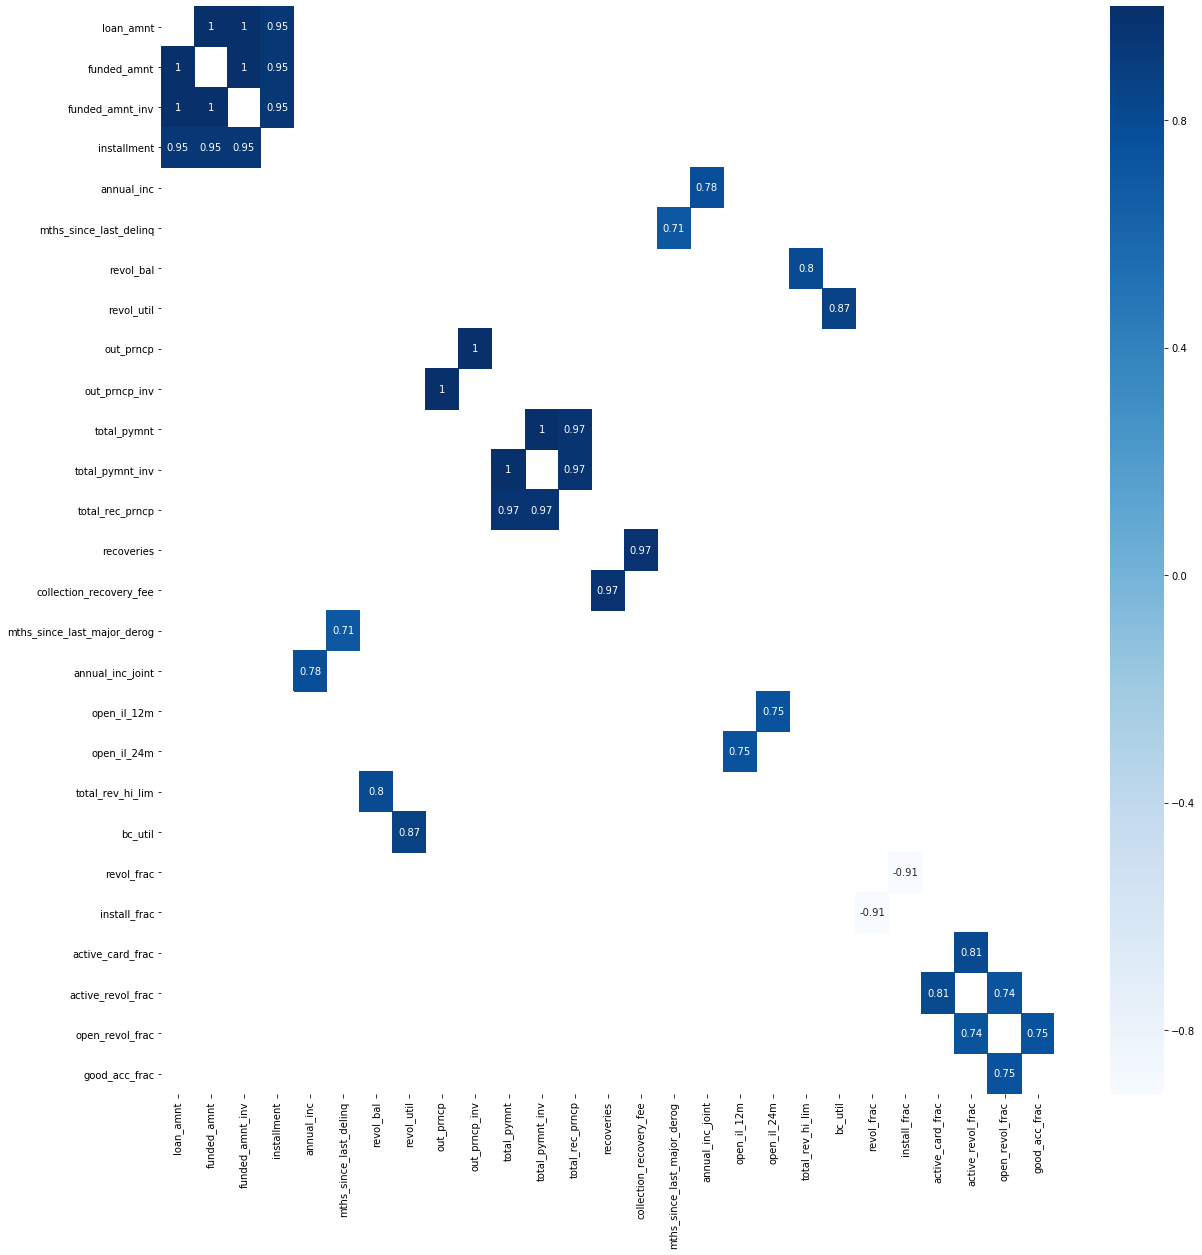

In [4]:
plot_corr(treat_df,threshold=0.7,size=20)

In [5]:
#### Removing any feature that are extremely highly correlated with other features
#### drop bc_util because it is included in revol_util and the fraction given by card_frac
#### drop out_prncp_inv <--- duplicate of out_prncp
#### drop total_pymnt_inv <--- duplicate of total_pymnt
#### drop revol_bal  <--- taken care of by total_rev_hi_lim and revol_util 
#### drop open_il_24m <--- duplicate of open_il_12m

In [6]:
print(pearsonr(treat_df.loc[~treat_df['open_il_12m'].isnull(),'open_il_12m'],treat_df.loc[~treat_df['open_il_12m'].isnull(),'int_rate']))
print(pearsonr(treat_df.loc[~treat_df['open_il_24m'].isnull(),'open_il_24m'],treat_df.loc[~treat_df['open_il_24m'].isnull(),'int_rate']))

(0.15879773288010451, 0.0)
(0.151846949642293, 0.0)


In [7]:
first_drop_df=treat_df.drop(['bc_util','out_prncp_inv','total_pymnt_inv',\
               'revol_bal','open_il_24m'],axis=1)

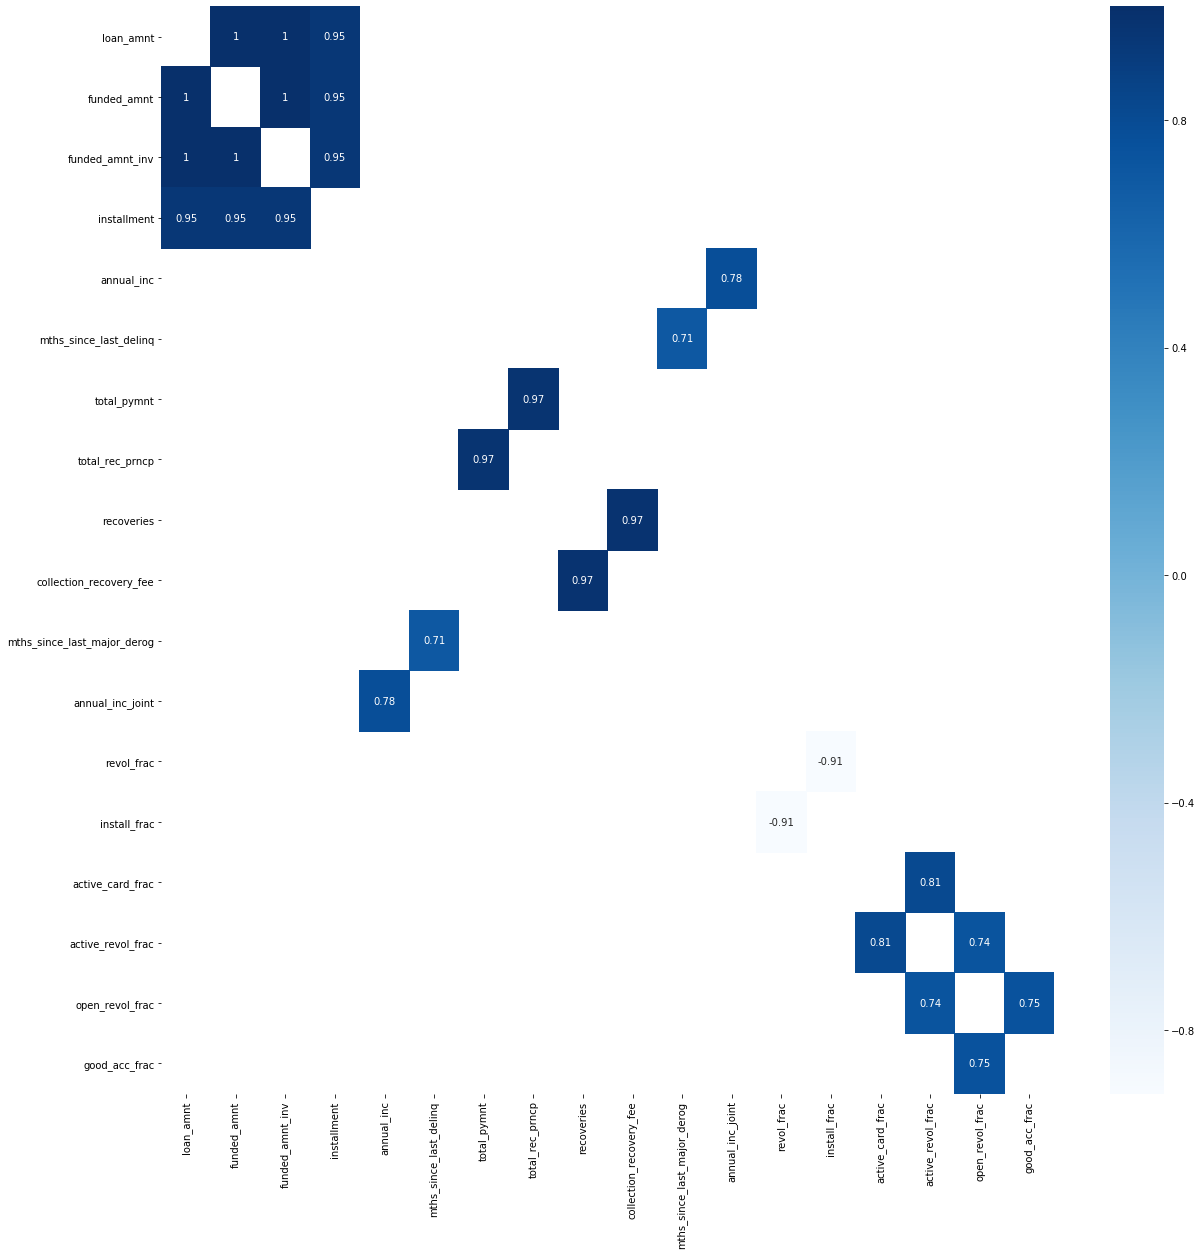

In [8]:
plot_corr(first_drop_df,threshold=0.7,size=20)

#### remove funded amount because they are basically the same as loan_amnt
#### remove installment because it is the same as loan amnt * int_rate
#### create a column: fully_invested = True if loan_amnt == funded_amnt_inv, else false. 

In [9]:
(first_drop_df.loc[:,'funded_amnt']!=first_drop_df.loc[:,'funded_amnt_inv']).sum()

151111

In [10]:
(first_drop_df.loc[:,'loan_amnt']!=first_drop_df.loc[:,'funded_amnt_inv']).sum()

151501

In [11]:
(first_drop_df.loc[:,'loan_amnt']!=first_drop_df.loc[:,'funded_amnt']).sum()

2065

In [12]:
first_drop_df['fully_invested']=first_drop_df.loc[:,'loan_amnt']==first_drop_df.loc[:,'funded_amnt_inv']
second_drop_df=first_drop_df.drop(['loan_amnt','funded_amnt_inv','installment'],axis=1)

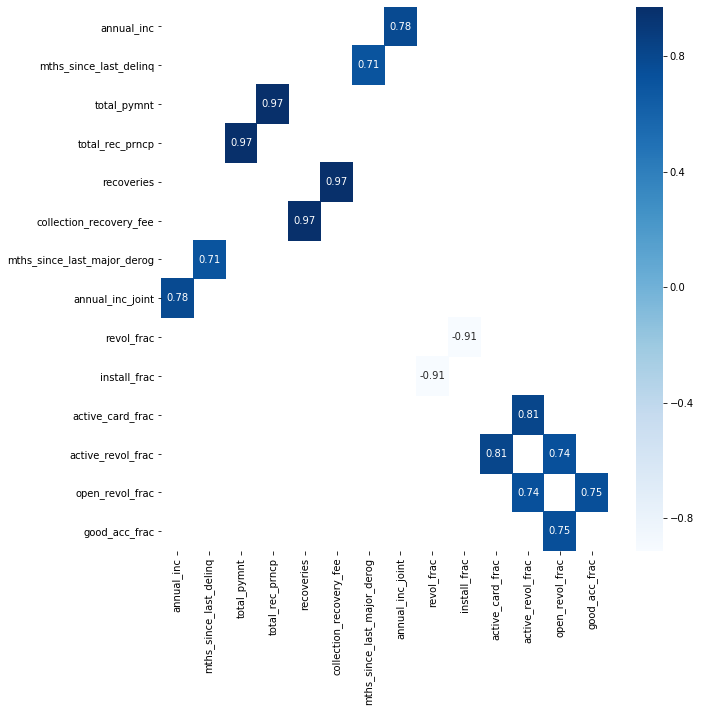

In [13]:
plot_corr(second_drop_df,threshold=0.7,size=10)

In [14]:
second_drop_df.shape

(2260668, 83)

In [15]:
df_number = second_drop_df.select_dtypes(include = 'number')
df_object = second_drop_df.select_dtypes(include = 'object')
df_category = second_drop_df.select_dtypes(include = 'category')
df_boolean = second_drop_df.select_dtypes(include = 'bool')
df_datetime = second_drop_df.select_dtypes(include = 'datetime')
df_timedelta = second_drop_df.select_dtypes(include = 'timedelta')
#######################################################
nominal_var=list(df_object.columns)
ordinal_var=list(df_number.columns)
continuous_var=list(df_number.columns)
time_var=list(df_datetime.columns)

In [16]:
print(len(np.array(nominal_var)))
print(len(np.array(continuous_var)))

19
63


In [17]:
second_drop_df.to_csv('lean_df_3.csv')

In [18]:
second_drop_df.head(10)

,funded_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,open_il_12m,mths_since_rcnt_il,il_util,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_bc_sats,num_tl_120dpd_2m,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit,fico,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,fully_invested
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36 months,13.99,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,Aug-2003,1.0,30.0,NaN,0.0,29.7,13.0,w,0.00,4421.723917,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,0.0,30.0,Individual,NaN,NaN,NaN,0.0,722.0,0.0,21.0,36.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,0.0,0.0,148.0,128.0,3.0,3.0,4.0,4.0,2.0,2.0,0.0,0.0,3.0,76.9,0.0,0.0,178050.0,13734.0,677.0,0.692308,0.230769,0.076923,0.555556,0.400000,0.444444,0.666667,0.444444,0.538462,True
68355089,24700.0,36 months,11.99,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,577xx,SD,16.06,1.0,Dec-1999,4.0,6.0,NaN,0.0,19.2,38.0,w,0.00,25679.660000,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,19.0,73.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,0.0,0.0,113.0,192.0,2.0,2.0,2.0,0.0,0.0,13.0,0.0,0.0,2.0,97.4,0.0,0.0,314017.0,24667.0,717.0,0.710526,0.157895,0.105263,0.629630,0.294118,0.185185,0.166667,0.740741,0.578947,True
68341763,20000.0,60 months,10.78,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,605xx,IL,10.78,0.0,Aug-2000,0.0,NaN,NaN,0.0,56.2,18.0,w,0.00,22705.924294,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,Mar-2019,0.0,NaN,Joint App,71000.0,13.85,Not Verified,0.0,0.0,0.0,19.0,73.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,0.0,0.0,125.0,184.0,14.0,14.0,101.0,10.0,0.0,2.0,0.0,0.0,0.0,100.0,0.0,0.0,218418.0,14877.0,697.0,0.388889,0.333333,0.277778,0.571429,0.500000,0.428571,0.166667,0.571429,0.333333,True
66310712,35000.0,60 months,14.85,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,076xx,NJ,17.06,0.0,Sep-2008,0.0,NaN,NaN,0.0,11.6,17.0,w,15897.65,31464.010000,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,Mar-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,23.0,70.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,0.0,0.0,36.0,87.0,2.0,2.0,2.0,NaN,0.0,8.0,0.0,0.0,1.0,100.0,0.0,0.0,381215.0,18000.0,787.0,0.764706,0.117647,0.058824,0.769231,0.400000,0.384615,0.500000,0.769231,0.764706,True
68476807,10400.0,60 months,22.45,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,174xx,PA,25.37,1.0,Jun-1998,3.0,12.0,NaN,0.0,64.5,35.0,w,0.00,11740.500000,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,NaN,Mar-2018,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,14.0,84.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,0.0,0.0,128.0,210.0,4.0,4.0,4.0,1.0,0.0,5.0,0.0,0.0,4.0,96.6,0.0,0.0,439570.0,88097.0,697.0,0.542857,0.285714,0.171429,0.473684,0.444444,0.315789,0.300000,0.368421,0.342857,True
684268